<h1>BankLoanModel<h1>

<h2>1. Read the column description and ensure you understand each attribute well<br>
2. Study the data distribution in each attribute, share your findings. (5 points)<br>
3. Get the target column distribution. Your comments<br>
4. Split the data into training and test set in the ratio of 70:30 respectively<br>
5. Use different classification models (Logistic, K-NN and Naïve Bayes) to predict the likelihood of a liability customer buying personal loans (15 points)<br>
6. Print the confusion matrix for all the above models (5 points)<br>
7. Give your reasoning on which is the best model in this case and why it performs better? (5 points)<br></h2>

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [5]:
bkln_df = pd.read_csv('Bank_Personal_Loan_Modelling-1.csv')
bkln_df.head(10)

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1
5,6,37,13,29,92121,4,0.4,2,155,0,0,0,1,0
6,7,53,27,72,91711,2,1.5,2,0,0,0,0,1,0
7,8,50,24,22,93943,1,0.3,3,0,0,0,0,0,1
8,9,35,10,81,90089,3,0.6,2,104,0,0,0,1,0
9,10,34,9,180,93023,1,8.9,3,0,1,0,0,0,0


In [6]:
bkln_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
ID                    5000 non-null int64
Age                   5000 non-null int64
Experience            5000 non-null int64
Income                5000 non-null int64
ZIP Code              5000 non-null int64
Family                5000 non-null int64
CCAvg                 5000 non-null float64
Education             5000 non-null int64
Mortgage              5000 non-null int64
Personal Loan         5000 non-null int64
Securities Account    5000 non-null int64
CD Account            5000 non-null int64
Online                5000 non-null int64
CreditCard            5000 non-null int64
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


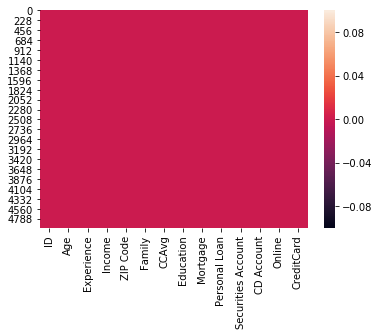

In [7]:
sns.heatmap(bkln_df.isnull())

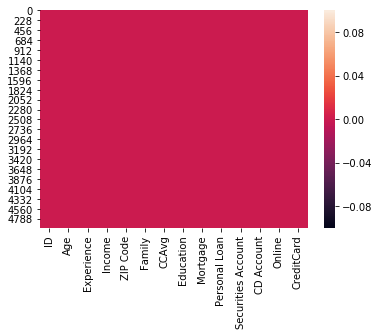

In [8]:
sns.heatmap(bkln_df.isna())

In [9]:
bkln_df.describe()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,2500.500000,45.338400,20.104600,73.774200,93152.503000,2.396400,1.937938,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,1443.520003,11.463166,11.467954,46.033729,2121.852197,1.147663,1.747659,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,1.000000,23.000000,-3.000000,8.000000,9307.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,1250.750000,35.000000,10.000000,39.000000,91911.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,2500.500000,45.000000,20.000000,64.000000,93437.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,3750.250000,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,5000.000000,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000182D4583EB8>,
      dtype=object)

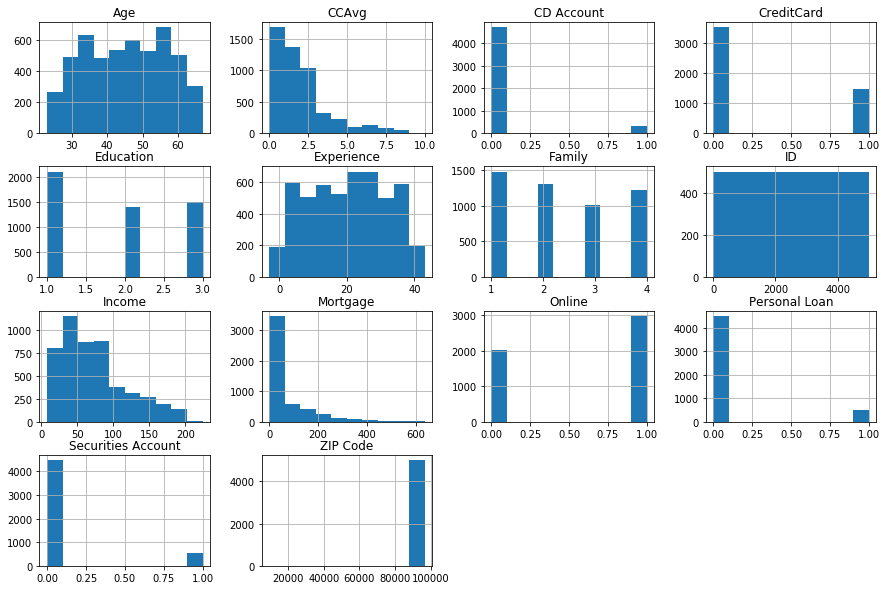

In [14]:
bkln_df.hist(figsize=(15,10))

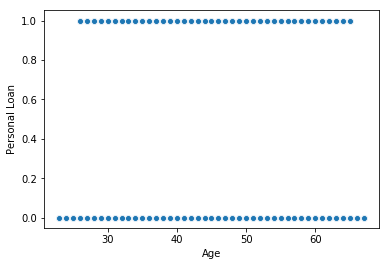

In [23]:
sns.scatterplot(x='Age',y='Personal Loan',data=bkln_df)

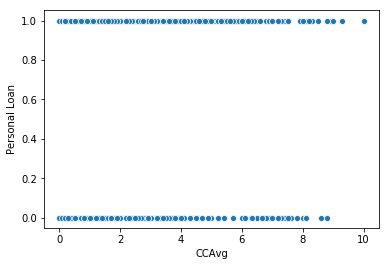

In [24]:
sns.scatterplot(x='CCAvg',y='Personal Loan',data=bkln_df)

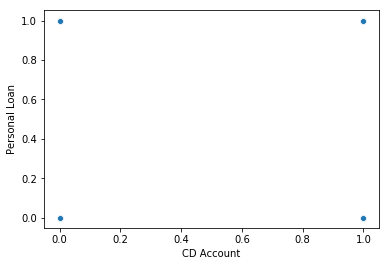

In [25]:
sns.scatterplot(x='CD Account',y='Personal Loan',data=bkln_df)

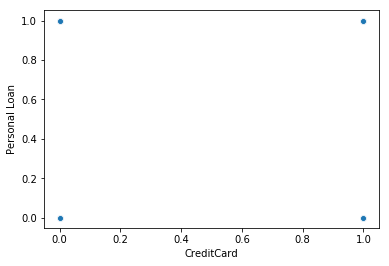

In [26]:
sns.scatterplot(x='CreditCard',y='Personal Loan',data=bkln_df)

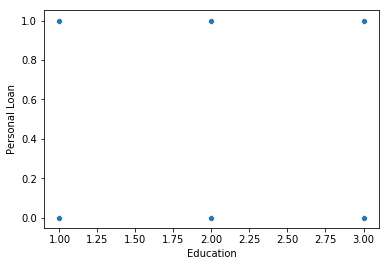

In [27]:
sns.scatterplot(x='Education',y='Personal Loan',data=bkln_df)

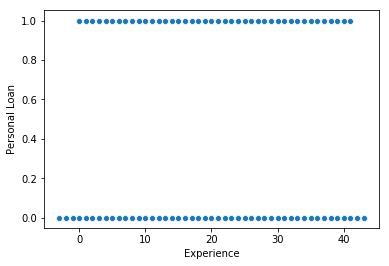

In [28]:
sns.scatterplot(x='Experience',y='Personal Loan',data=bkln_df)

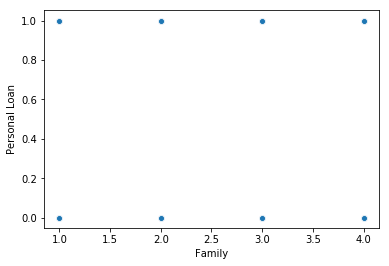

In [29]:
sns.scatterplot(x='Family',y='Personal Loan',data=bkln_df)

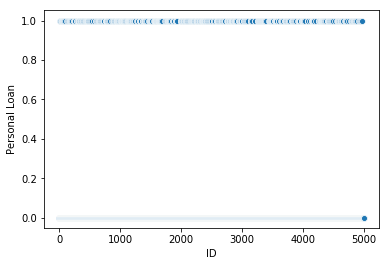

In [30]:
sns.scatterplot(x='ID',y='Personal Loan',data=bkln_df)

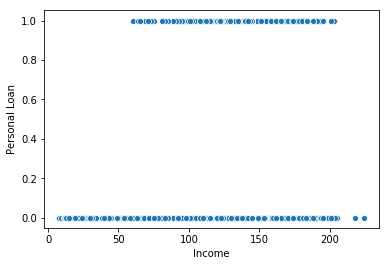

In [31]:
sns.scatterplot(x='Income',y='Personal Loan',data=bkln_df)

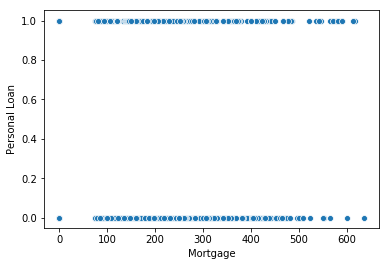

In [32]:
sns.scatterplot(x='Mortgage',y='Personal Loan',data=bkln_df)

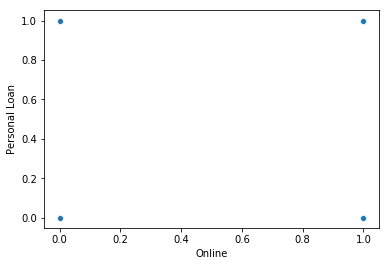

In [33]:
sns.scatterplot(x='Online',y='Personal Loan',data=bkln_df)

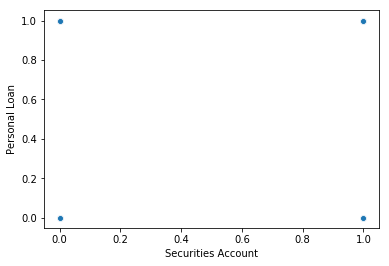

In [34]:
sns.scatterplot(x='Securities Account',y='Personal Loan',data=bkln_df)

In [41]:
from sklearn.preprocessing import MinMaxScaler
mm = MinMaxScaler()
bkln_df_mm = pd.DataFrame(data=mm.fit_transform(bkln_df),columns=bkln_df.columns)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000182D9F3C4E0>,
      dtype=object)

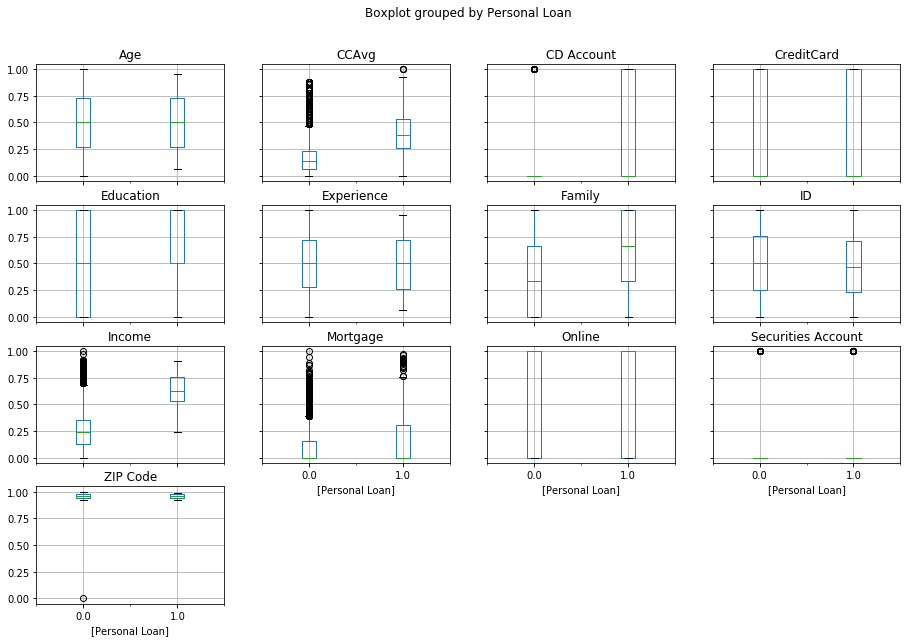

In [42]:
bkln_df_mm.boxplot(by='Personal Loan', figsize=(15,10))

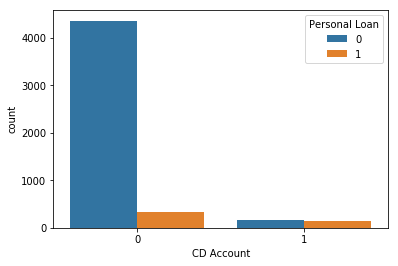

In [44]:
sns.countplot(x='CD Account',data=bkln_df,hue='Personal Loan')

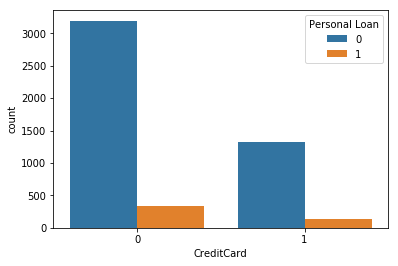

In [45]:
sns.countplot(x='CreditCard',data=bkln_df,hue='Personal Loan')

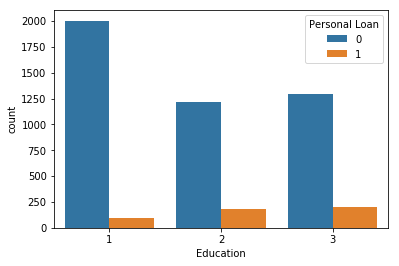

In [46]:
sns.countplot(x='Education',data=bkln_df,hue='Personal Loan')

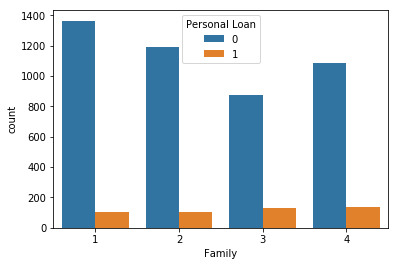

In [48]:
sns.countplot(x='Family',data=bkln_df,hue='Personal Loan')

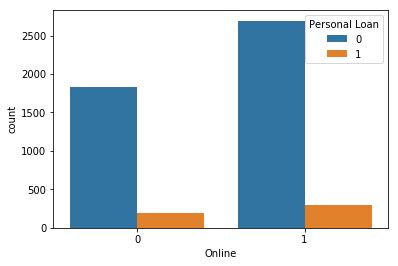

In [50]:
sns.countplot(x='Online',data=bkln_df,hue='Personal Loan')

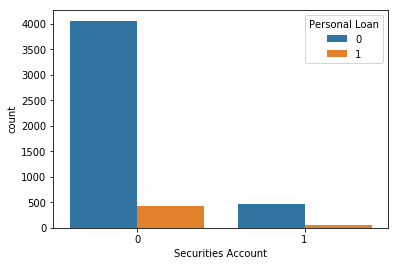

In [51]:
sns.countplot(x='Securities Account',data=bkln_df,hue='Personal Loan')